# Day 1 - Sparse grids

## Homework 1 - Exercise 1

Author: Martina Fraschini

The code is exectuted only for the oscillatory test function, as the implementation of the other functions is trivial.

In [1]:
# import packages
import TasmanianSG
import numpy as np
import math
from random import uniform
from matplotlib import pyplot as plt

In [2]:
# define function for interpolation with non-adaptive sparse grids
def nonadaptive(dd, out, lev, basis, w1, cdd):
    # create an empty grid instance
    grid = TasmanianSG.TasmanianSparseGrid()
    
    # construct sparse grid
    grid.makeLocalPolynomialGrid(dd, out, lev, basis, "localp")
    aPoints = grid.getPoints()
    iNumP1 = aPoints.shape[0]
    aVals = np.empty([iNumP1,out])
    args = [w1, cdd, aPoints, aVals]
    aVals = oscillatory(args)
    grid.loadNeededPoints(aVals)
    
    return grid, iNumP1


In [3]:
# define function for interpolation with adaptive sparse grids
def adaptive(dd, out, lev, reflev, tol, basis, w1, cdd):
    # construct sparse grid (non-adaptive)
    grid, NumP = nonadaptive(dd, out, lev, basis, w1, cdd)
    
    #refinement level
    for iK in range(reflev):
        grid.setSurplusRefinement(tol, 1, "fds")
        aPoints = grid.getNeededPoints()
        iNumP1 = aPoints.shape[0]
        aVals = np.empty([iNumP1,out])
        args = [w1, cdd, aPoints, aVals]
        aVals = oscillatory(args)
        grid.loadNeededPoints(aVals)
        
    return grid, iNumP1


In [4]:
# define function to compute max error
def maxerr(grid, aPnts, aTres):
    aRes = grid.evaluateBatch(aPnts)
    err = max(np.fabs(aRes[:,0] - aTres))
    return err

In [5]:
# define function to approximate:
def oscillatory(args):
    w1, cdd, points, aTres = args
    NN = points.shape[0]
    for iI in range(NN):
        res = 2 * math.pi * w1
        for iJ in range(dd):
            res += cdd[iJ] * points[iI,iJ]
        aTres[iI] = math.cos(res)
        
    return aTres


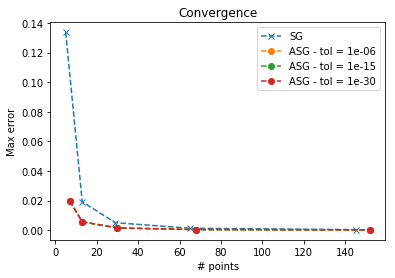

In [6]:
# define parameters
dd = 2    # dimension
NN = 1000    # number of test points
w1 = uniform(-1.0, 1.0)    # construction of w1
cdd = np.empty(dd)    # construction of vector of c values
for iJ in range(dd):
    cdd[iJ] = uniform(-1.0, 1.0)

out = 1    # number of outputs for grid
lev = 5    # number of levels for sparse grid
basis = 1    #1= linear basis functions
reflev = 15    # refinement level for adaptive sparse grid
tol2 = 1.E-6    # tolerance criterion for adaptive sparse grid
tol3 = 1.E-15
tol4 = 1.E-30

function = lambda x: oscillatory(x)

# 1000 "dim"-dimensional sample points
aPnts = np.empty([NN, dd])
for iI in range(NN):
    for iJ in range(dd):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# values of function at sample points
aTres = np.empty([NN,])
args = [w1, cdd, aPnts, aTres]
aTres = function(args)

NumPts1 = np.empty([lev,])
NumPts2 = np.empty([lev,])
NumPts3 = np.empty([lev,])
NumPts4 = np.empty([lev,])
err1 = np.empty([lev,])
err2 = np.empty([lev,])
err3 = np.empty([lev,])
err4 = np.empty([lev,])
for ll in range(lev):
    grid1, NumPts1[ll] = nonadaptive(dd, out, ll+1, basis, w1, cdd)
    err1[ll] = maxerr(grid1, aPnts, aTres)
    grid2, NumPts2[ll] = adaptive(dd, out, 1, ll+1, tol2, basis, w1, cdd)
    err2[ll] = maxerr(grid2, aPnts, aTres)
    grid3, NumPts3[ll] = adaptive(dd, out, 1, ll+1, tol3, basis, w1, cdd)
    err3[ll] = maxerr(grid3, aPnts, aTres)
    grid4, NumPts4[ll] = adaptive(dd, out, 1, ll+1, tol4, basis, w1, cdd)
    err4[ll] = maxerr(grid4, aPnts, aTres)

plt.plot(NumPts1, err1, 'x--', label='SG')
plt.plot(NumPts2, err2, 'o--', label='ASG - tol = {}'.format(tol2))
plt.plot(NumPts3, err3, 'o--', label='ASG - tol = {}'.format(tol3))
plt.plot(NumPts4, err4, 'o--', label='ASG - tol = {}'.format(tol4))
plt.xlabel("# points")
plt.ylabel("Max error")
plt.title("Convergence")
plt.legend()
plt.show()

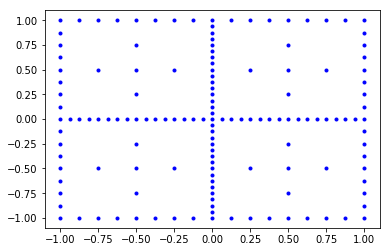

In [7]:
grid1.plotPoints2D()
plt.show()

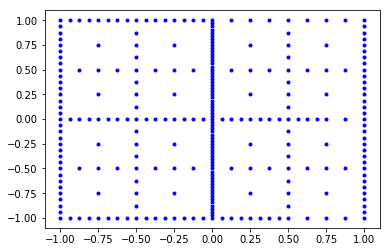

In [8]:
grid2.plotPoints2D()
plt.show()

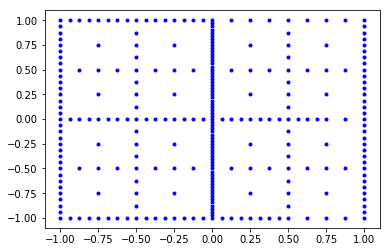

In [9]:
grid3.plotPoints2D()
plt.show()

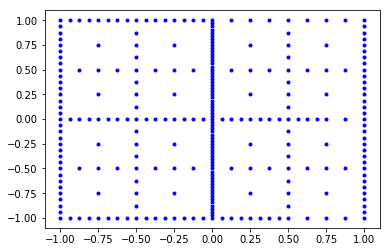

In [10]:
grid4.plotPoints2D()
plt.show()